In [1]:
#import libraries 
import pandas as pd
import numpy as np


In [2]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

import seaborn as sns

In [3]:
pd.options.display.max_columns = None

In [4]:
#function to read and format csv file 
#input: file
#output: df without NaNs, proper format

def read_format(file):
    df = pd.read_csv(file, header=0, parse_dates=True)
    df = df.drop(df.tail(2).index)
    #df['Open Interest'].fillna(method='ffill', inplace=True)
    
    
    return df

In [5]:
# set files to a variable
file_one = r"C:\Users\Matt\Desktop\data\subject_data.csv"

In [6]:
# read in and clean csv files to a data frame 
tables = read_format(file_one)

In [7]:
len(tables)

2040

In [10]:
days_to_train = 180

In [11]:
new_df = tables.iloc[-days_to_train:].copy()

In [12]:
new_df.head()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
1860,5/21/2019,E6M19,1.11920,1.12140,1.11665,1.11830,-0.00105,176104,516122
1861,5/22/2019,E6M19,1.11855,1.12050,1.11725,1.11840,0.00010,133181,521493
1862,5/23/2019,E6M19,1.11740,1.12085,1.11265,1.12035,0.00195,257802,541890
1863,5/24/2019,E6M19,1.12025,1.12330,1.11975,1.12260,0.00225,155682,535859
1864,5/28/2019,E6M19,1.12280,1.12345,1.11770,1.11835,-0.00425,218424,536798


In [13]:
'''
    Objective:  sample a dataframe for the historical volatility, find the mean over the iterations and probability 
                that vol is greater than a certain vol over that period.  
    INPUT:
    dataframe: the dataframe to sample from
    iterations: how many iterations
    range_btw_dates: range of dates to sample in consecutive order
    
    straddle_to_compare: straddle to calculate what percentage of the iterations were greater 
    lost_threshold: straddle of stop loss to calculate what percentage of the iterations were greater, 
    the downside stop loss percentage
    profit_objective: straddle of objective profit to calculate what percentage of the iterations were greater, 
    the upside, profit taking
    
    OUTPUT:
    Return the list of sample means, print a variety of statistics around the sample means.  
'''

def option_calc_group_days(df, iterations, range_btw_dates, starting_price, 
                           strike_price, prob_up_move, replace = True):
    x = 0
    the_payout = []
    #max index number, since we are evaluating between dates, those dates cant exceed the size of dataframe 
    max_index = len(df) - range_btw_dates
    while x < iterations:
        #sample a row
        the_sample = df.sample()
        #grab the index number
        the_sample_index = df.index.get_loc(the_sample.iloc[0].name)
        
        #ensure the_start_index does not run off the table
        if the_sample_index < range_btw_dates:
            the_start_index = np.abs(the_sample_index - range_btw_dates)
        else:
            the_start_index = the_sample_index - range_btw_dates
            
            
        #create the range distance between start of index and btwn_the_dates  
        plus_the_index = the_start_index + range_btw_dates
        
        the_new_df = df[the_start_index:plus_the_index]
        start_price = the_new_df.head(1)['Close'].iloc[0]
        end_price = the_new_df.tail(1)['Close'].iloc[0]
        
        #selet if market is going up or down
        nums = np.random.choice([0, 1], size=1, p=[1-prob_up_move, prob_up_move])
        if nums[0] == 1:
            the_move = (((np.abs(start_price - end_price)) / start_price) + 1) * starting_price
        else: 
            the_move = 0
        
        is_it_in_the_money = the_move - strike_price
        
        if is_it_in_the_money > 0:
            payout = the_move - strike_price
        else:
            payout = 0
        
            
        
        
        the_payout.append(payout)
    
        x = x + 1 
    mean = np.mean(the_payout)
    median = np.median(the_payout)
    smallest_value = np.min(the_payout)
    great_value = np.max(the_payout)
    
    
    
    print(mean)
    print (median)
    print(smallest_value)
    print(great_value)
    
    


In [14]:
len(new_df)

180

In [15]:
new_df.head()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
1860,5/21/2019,E6M19,1.11920,1.12140,1.11665,1.11830,-0.00105,176104,516122
1861,5/22/2019,E6M19,1.11855,1.12050,1.11725,1.11840,0.00010,133181,521493
1862,5/23/2019,E6M19,1.11740,1.12085,1.11265,1.12035,0.00195,257802,541890
1863,5/24/2019,E6M19,1.12025,1.12330,1.11975,1.12260,0.00225,155682,535859
1864,5/28/2019,E6M19,1.12280,1.12345,1.11770,1.11835,-0.00425,218424,536798


In [17]:
the_list = option_calc_group_days(new_df, 10000, 16, 1.09165, 
                           1.0850, .5, replace = True)

0.008199341236369173
0.0
0.0
0.03318568635293073


In [19]:
'''
    Objective:  sample a dataframe for the historical volatility, find the mean over the iterations and probability 
                that vol is greater than a certain vol over that period.  
    INPUT:
    dataframe: the dataframe to sample from
    iterations: how many iterations
    range_btw_dates: range of dates to sample in consecutive order
    
    straddle_to_compare: straddle to calculate what percentage of the iterations were greater 
    lost_threshold: straddle of stop loss to calculate what percentage of the iterations were greater, 
    the downside stop loss percentage
    profit_objective: straddle of objective profit to calculate what percentage of the iterations were greater, 
    the upside, profit taking
    
    OUTPUT:
    Return the list of sample means, print a variety of statistics around the sample means.  
'''

def option_calc_group_days_updown(df, iterations, range_btw_dates, starting_price, 
                           strike_price, prob_up_move, replace = True):
    x = 0
    the_payout_for_up = []
    the_payout_for_down = []
    #max index number, since we are evaluating between dates, those dates cant exceed the size of dataframe 
    max_index = len(df) - range_btw_dates
    while x < iterations:
        #sample a row
        the_sample = df.sample()
        #grab the index number
        the_sample_index = df.index.get_loc(the_sample.iloc[0].name)
        
        #ensure the_start_index does not run off the table
        if the_sample_index < range_btw_dates:
            the_start_index = np.abs(the_sample_index - range_btw_dates)
        else:
            the_start_index = the_sample_index - range_btw_dates
            
            
        #create the range distance between start of index and btwn_the_dates  
        plus_the_index = the_start_index + range_btw_dates
        
        the_new_df = df[the_start_index:plus_the_index]
        start_price = the_new_df.head(1)['Close'].iloc[0]
        end_price = the_new_df.tail(1)['Close'].iloc[0]
        
        #selet if market is going up or down
        nums = np.random.choice([0, 1], size=1, p=[1-prob_up_move, prob_up_move])
        if nums[0] == 1:
            the_move = (((np.abs(start_price - end_price)) / start_price) + 1) * starting_price
        else: 
            the_move = 0
        
        is_it_in_the_money = the_move - strike_price
        
        if is_it_in_the_money > 0:
            payout = the_move - strike_price
        else:
            payout = 0
        was_it_up_or_down_move = end_price - start_price
        if was_it_up_or_down_move >= 0:
            the_payout_for_up.append(payout)
        else:
            the_payout_for_down.append(payout)
            
            
        x = x + 1 
    mean_up = np.mean(the_payout_for_up)
    mean_down = np.mean(the_payout_for_down)
    
    median_up = np.median(the_payout_for_up)
    median_down = np.median(the_payout_for_down)
    
    least_value_up = np.min(the_payout_for_up)
    least_value_down = np.min(the_payout_for_down)
    
    most_value_up = np.max(the_payout_for_up)
    most_value_down = np.max(the_payout_for_down)
    
    

    
    print('the mean for up is', mean_up)
    print('the mean for down is', mean_down)
    
    print('the max for up is', most_value_up)
    print('the max for down is', most_value_down)
    
    print('the least for up is', least_value_up)
    print('the least for down is', least_value_down)
    
    print('the median for up is', median_up)
    print('the median for down is', median_down)
    
    
    print('the len of up is', len(the_payout_for_up))
    print('the len of down is', len(the_payout_for_down))
    

    


In [14]:
option_calc_group_days_updown(new_df, 8500, 27, 8745, 
                           8800, .5, replace = True)
    

the mean for up is 1067.5248208043463
the mean for down is 525.9458711792438
the max for up is 5817.949729195325
the max for down is 2294.1701809198003
the least for up is 0.0
the least for down is 0.0
the median for up is 0.0
the median for down is 0.0
the len of up is 5515
the len of down is 2985


In [15]:
def option_calc_group_list(df, iterations, range_btw_dates, starting_price, 
                           strike_price, prob_up_move, replace = True):
    x = 0
    the_payout_for_up = []
    the_payout_for_down = []
    #max index number, since we are evaluating between dates, those dates cant exceed the size of dataframe 
    max_index = len(df) - range_btw_dates
    while x < iterations:
        #sample a row
        the_sample = df.sample()
        #grab the index number
        the_sample_index = df.index.get_loc(the_sample.iloc[0].name)
        
        #ensure the_start_index does not run off the table
        if the_sample_index < range_btw_dates:
            the_start_index = np.abs(the_sample_index - range_btw_dates)
        else:
            the_start_index = the_sample_index - range_btw_dates
            
            
        #create the range distance between start of index and btwn_the_dates  
        plus_the_index = the_start_index + range_btw_dates
        
        the_new_df = df[the_start_index:plus_the_index]
        start_price = the_new_df.head(1)['Close'].iloc[0]
        end_price = the_new_df.tail(1)['Close'].iloc[0]
        
        #selet if market is going up or down
        nums = np.random.choice([0, 1], size=1, p=[1-prob_up_move, prob_up_move])
        if nums[0] == 1:
            the_move = (((np.abs(start_price - end_price)) / start_price) + 1) * starting_price
        else: 
            the_move = 0
        
        is_it_in_the_money = the_move - strike_price
        
        if is_it_in_the_money > 0:
            payout = the_move - strike_price
        else:
            payout = 0
        was_it_up_or_down_move = end_price - start_price
        if was_it_up_or_down_move >= 0:
            the_payout_for_up.append(payout)
        else:
            the_payout_for_down.append(payout)
            
            
        x = x + 1 
        
    return the_payout_for_up
    

In [16]:
a = option_calc_group_list(new_df, 8500, 27, 8745, 
                           8800, .5, replace = True)

In [17]:
len(a)

5526

C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


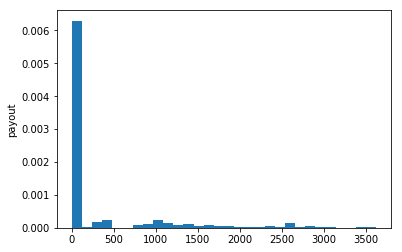

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = a
plt.hist(x, normed=True, bins=30)
plt.ylabel('payout');

In [19]:
sum(i > 2800 for i in a) / len(a)

0.020810712993123415

In [20]:
outliers_removed = []
for i in a:
    if i < 2800:
        outliers_removed.append(i)
        

In [21]:
len(outliers_removed)

5411

In [22]:
np.mean(outliers_removed)

276.0822609862268